# Investment Portfolio

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#                                            Portfolio Allocation

In [2]:
def get_data(name,start,end):
    return web.DataReader(name,'yahoo','2016-01-01','2019-01-01')['Adj Close']

In [4]:
name='AAPl'
apple=pd.DataFrame(columns=['Adj Close'])
apple['Adj Close']= get_data(name,'2016-01-01','2019-01-01')

In [5]:
name='DIS'
disney=pd.DataFrame(columns=['Adj Close'])
disney['Adj Close']= get_data(name,'2016-01-01','2019-01-01')

In [6]:
name='TSLA'
tesla=pd.DataFrame(columns=['Adj Close'])
tesla['Adj Close']= get_data(name,'2016-01-01','2019-01-01')

In [7]:
name='NKE'
nike=pd.DataFrame(columns=['Adj Close'])
nike['Adj Close']= get_data(name,'2016-01-01','2019-01-01')

In [8]:
for stock_df in (apple,disney,tesla,nike):
    stock_df["Normed Return"]=stock_df["Adj Close"]/stock_df.iloc[0]["Adj Close"]

for stock_df, allo in zip((apple,disney,tesla,nike),[.3,.2,.4,.1]):
    stock_df["Allocation"]=stock_df["Normed Return"]*allo
    
for stock_df in (apple,disney,tesla,nike):
    stock_df["Position Values"]=stock_df["Allocation"]*1000000

apple.head()

,Adj Close,Normed Return,Allocation,Position Values
Date,,,,
2016-01-04,98.742249,1.000000,0.300000,300000.000000
2016-01-05,96.267815,0.974940,0.292482,292482.142338
2016-01-06,94.383888,0.955861,0.286758,286758.372363
2016-01-07,90.400467,0.915520,0.274656,274655.889227
2016-01-08,90.878479,0.920361,0.276108,276108.191839


In [9]:
all_pos_vals=[apple["Position Values"],disney["Position Values"],
             tesla["Position Values"],nike["Position Values"]]

portfolio_val=pd.concat(all_pos_vals,axis=1)
portfolio_val.columns=["Apple Pos","Disney Pos","Tesla Pos","Nike Pos"]
portfolio_val["Total Pos"]=portfolio_val.sum(axis=1)
portfolio_val.head()

,Apple Pos,Disney Pos,Tesla Pos,Nike Pos,Total Pos
Date,,,,,
2016-01-04,300000.000000,200000.000000,400000.000000,100000.000000,1000000.000000
2016-01-05,292482.142338,195960.407150,400035.788932,101397.911604,989876.250025
2016-01-06,286758.372363,194911.627369,392175.801792,99951.248414,973797.049937
2016-01-07,274655.889227,193241.429409,386106.244773,97285.418603,951288.982011
2016-01-08,276108.191839,192755.882057,377780.755635,95692.448658,942337.278190


Text(0.5, 1.0, 'Total Portfolio Value')

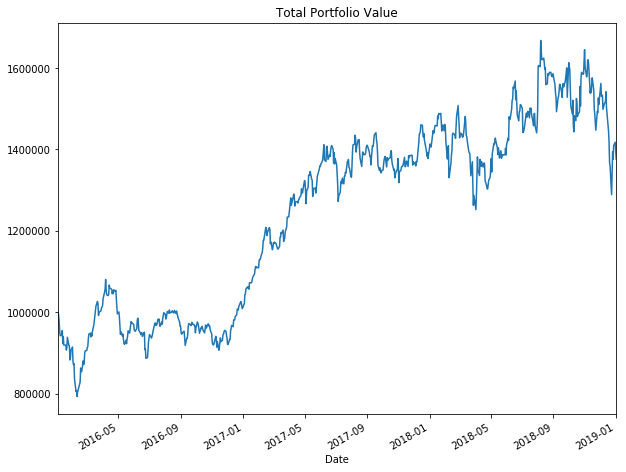

In [10]:
portfolio_val["Total Pos"].plot(figsize=(10,8))
plt.title("Total Portfolio Value")

Text(0.5, 1.0, "Stock's Positions")

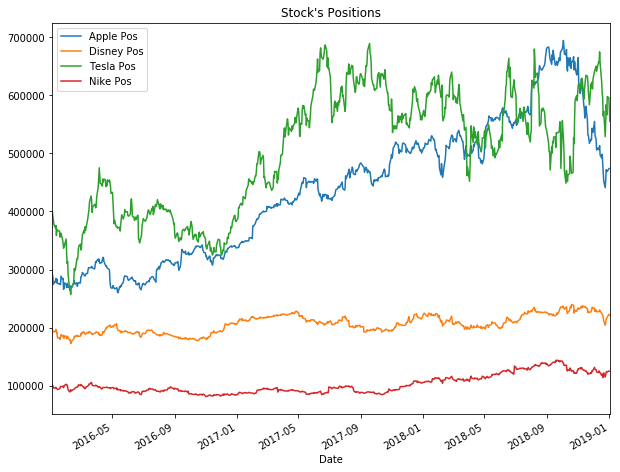

In [11]:
portfolio_val.drop("Total Pos",axis=1).plot(figsize=(10,8))
plt.title("Stock's Positions")

## Cumulative return 

In [12]:
cumulative_return=100*(portfolio_val["Total Pos"][-1]/portfolio_val["Total Pos"][0]-1)
cumulative_return

37.615582648820855

In [13]:
portfolio_val["Total Pos"][-1]

1376155.8264882085

## Sharpe Ratio

In [14]:
portfolio_val["Daily Return"]=portfolio_val["Total Pos"].pct_change(1)
portfolio_val.head()

,Apple Pos,Disney Pos,Tesla Pos,Nike Pos,Total Pos,Daily Return
Date,,,,,,
2016-01-04,300000.000000,200000.000000,400000.000000,100000.000000,1000000.000000,NaN
2016-01-05,292482.142338,195960.407150,400035.788932,101397.911604,989876.250025,-0.010124
2016-01-06,286758.372363,194911.627369,392175.801792,99951.248414,973797.049937,-0.016244
2016-01-07,274655.889227,193241.429409,386106.244773,97285.418603,951288.982011,-0.023114
2016-01-08,276108.191839,192755.882057,377780.755635,95692.448658,942337.278190,-0.009410


In [15]:
sharpe_ratio=portfolio_val["Daily Return"].mean()/portfolio_val["Daily Return"].std()
sharpe_ratio

0.0359006669817118

In [16]:
annualized_sharpe_ratio=(252**0.5)*sharpe_ratio
annualized_sharpe_ratio

0.5699054204097436

# Portfolio Optimization

In [17]:
def get_data(name,start,end):
    return web.DataReader(name,'yahoo','2016-01-01','2019-01-01')['Adj Close']

In [19]:
name='AAPl'
apple=pd.DataFrame(columns=['Adj Close'])
apple['Adj Close']= get_data(name,'2016-01-01','2019-01-01')

In [20]:
name='DIS'
disney=pd.DataFrame(columns=['Adj Close'])
disney['Adj Close']= get_data(name,'2016-01-01','2019-01-01')

In [21]:
name='TSLA'
tesla=pd.DataFrame(columns=['Adj Close'])
tesla['Adj Close']= get_data(name,'2016-01-01','2019-01-01')

In [22]:
name='NKE'
nike=pd.DataFrame(columns=['Adj Close'])
nike['Adj Close']= get_data(name,'2016-01-01','2019-01-01')

In [23]:
stocks=pd.concat([apple,disney,tesla,nike],axis=1)
stocks.columns=["Apple","Disney","Tesla","Nike"]
stocks.head()

,Apple,Disney,Tesla,Nike
Date,,,,
2016-01-04,98.742249,97.737862,223.410004,58.693565
2016-01-05,96.267815,95.763756,223.429993,59.514050
2016-01-06,94.383888,95.251228,219.039993,58.664951
2016-01-07,90.400467,94.435020,215.649994,57.100281
2016-01-08,90.878479,94.197739,211.000000,56.165310


In [24]:
log_ret=np.log(stocks/stocks.shift()).dropna()
log_ret.head()

,Apple,Disney,Tesla,Nike
Date,,,,
2016-01-05,-0.025379,-0.020405,0.000089,0.013882
2016-01-06,-0.019764,-0.005366,-0.019844,-0.014370
2016-01-07,-0.043121,-0.008606,-0.015598,-0.027033
2016-01-08,0.005274,-0.002516,-0.021799,-0.016510
2016-01-11,0.016063,0.006728,-0.015041,0.011485


In [25]:
log_ret.mean()

Apple     0.000607
Disney    0.000136
Tesla     0.000435
Nike      0.000298
dtype: float64

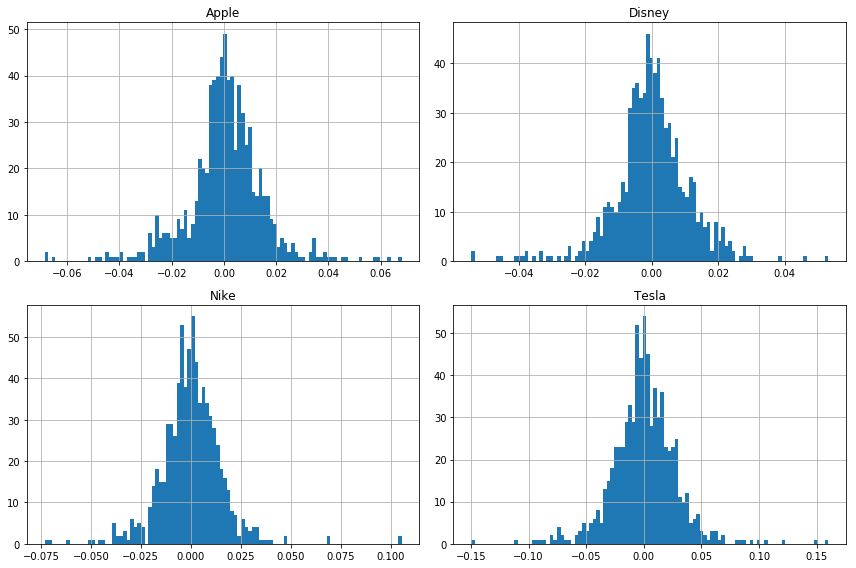

In [26]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [27]:
log_ret.cov()*252

,Apple,Disney,Tesla,Nike
Apple,0.056037,0.016303,0.030950,0.017419
Disney,0.016303,0.032077,0.020293,0.015453
Tesla,0.030950,0.020293,0.203663,0.029862
Nike,0.017419,0.015453,0.029862,0.060607


In [28]:
np.random.seed(101)
num_ports=5000
all_weights=np.zeros((num_ports,len(stocks.columns)))
ret_arr=np.zeros(num_ports)
vol_arr=np.zeros(num_ports)
sharpe_arr=np.zeros(num_ports)

for i in range(num_ports):
    #Weights
    weights=np.array(np.random.random(4))
    weights=weights/np.sum(weights)

    #Save weights
    all_weights[i,:]=weights
    
    #Expected Return
    ret_arr[i]=np.sum((log_ret.mean()*weights)*252)

    #Expected volatility
    vol_arr[i]=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    #Sharpe Ratio
    sharpe_arr[i]=ret_arr[i]/vol_arr[i]

In [29]:
sharpe_arr.max()

0.6554181481033347

In [30]:
sharpe_arr.argmax()

1248

## All weights 

In [31]:
all_weights[1248,:]

array([0.87193323, 0.00853593, 0.00258882, 0.11694202])

In [32]:
max_sr_ret=ret_arr[1248]
max_sr_vol=vol_arr[1248]

## Investment Portfolio

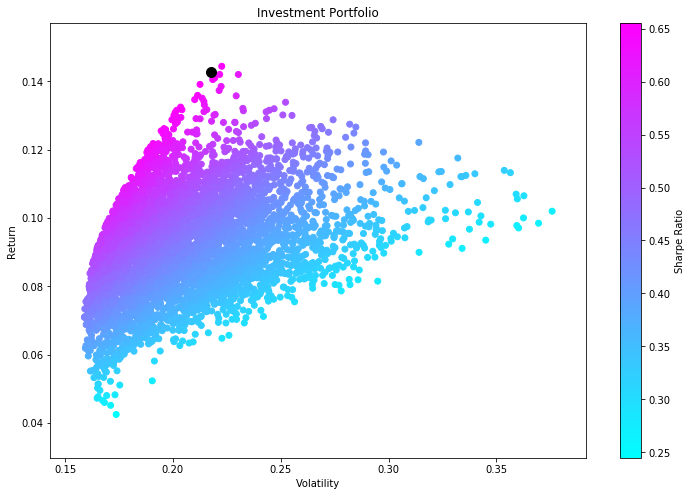

In [33]:
#COLORS PLASMA; INFERNO, MAGMA, CIVIDIS, VIRIDIS, COOL
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap="cool")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Investment Portfolio")

plt.scatter(max_sr_vol,max_sr_ret,c="black",s=100)

## Expected return

In [34]:
ret_arr[1248]

0.1427246292560072

## Expected volatility

In [35]:
vol_arr[1248]

0.21776117989565485

## Simulación para portafolios

In [36]:
R=np.log(portfolio_val['Total Pos']/portfolio_val['Total Pos'].shift()).dropna()

In [37]:
def simR(mu,std,start,ndays,N):
    dates=pd.date_range(start,periods=ndays)
    data=np.random.normal(mu,std,(ndays,N))
    return pd.DataFrame(index=dates,data=data)

In [38]:
datosR=simR(R.mean(),R.std(),'2019-01-01',365,1000)

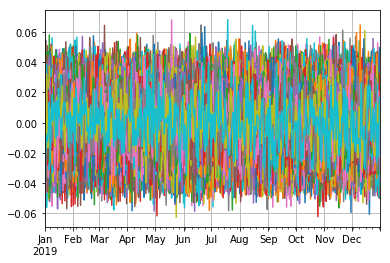

In [39]:
datosR.plot(grid=True,legend=False)

In [40]:
simCloses=portfolio_val["Total Pos"].iloc[-1]*((1+datosR).cumprod())

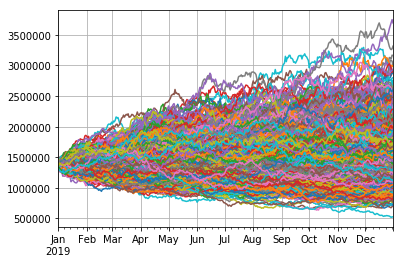

In [41]:
simCloses.plot(grid=True,legend=False)

In [42]:
U=portfolio_val["Total Pos"].iloc[-1]*1.2
dates=pd.date_range('2020-01-01',periods=730)
Umbral=pd.DataFrame(index=dates,columns=['U'],data=U*np.ones(len(dates)))
Umbral

,U
2020-01-01,1.651387e+06
2020-01-02,1.651387e+06
2020-01-03,1.651387e+06
2020-01-04,1.651387e+06
2020-01-05,1.651387e+06
2020-01-06,1.651387e+06
2020-01-07,1.651387e+06
2020-01-08,1.651387e+06
2020-01-09,1.651387e+06
2020-01-10,1.651387e+06


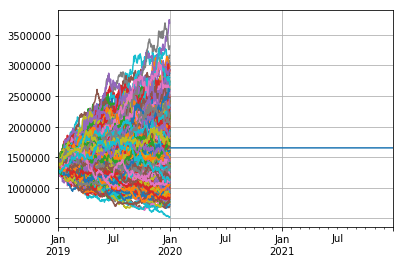

In [43]:
simCloses_U=pd.concat([simCloses,Umbral],axis=1)
simCloses_U.plot(legend=False,grid=True)

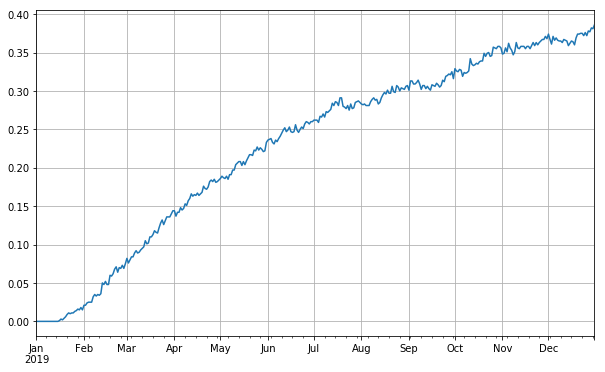

In [44]:
C=simCloses>U
P=pd.DataFrame(np.mean(C,axis=1))
P.plot(legend=False,grid=True,figsize=(10,6))